In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
directory = '/home/ecwheele/shared_for_class/'
tpm = pd.read_csv(directory+"u2af1_shrna_tpm.csv", index_col=0)
rpkm = pd.read_csv(directory+"u2af1_shrna_rpkm.csv", index_col=0)
tpm.head()

,u2af1_control_k562_rep1,u2af1_control_k562_rep2,u2af1_shrna_k562_rep1,u2af1_shrna_k562_rep2
Geneid,,,,
ENSG00000223972.4,0.000000,0.094930,0.000000,0.000000
ENSG00000227232.4,8.556370,8.282616,7.148844,3.092353
ENSG00000243485.2,0.000000,0.163269,0.000000,0.174405
ENSG00000237613.2,0.773976,0.546998,0.750441,0.730385
ENSG00000268020.2,0.000000,0.000000,0.000000,0.000000


(array([  5.78040000e+04,   7.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([     0.        ,   4524.79654369,   9049.59308738,  13574.38963107,
         18099.18617476,  22623.98271845,  27148.77926214,  31673.57580583,
         36198.37234952,  40723.16889321,  45247.9654369 ]),
 <a list of 10 Patch objects>)

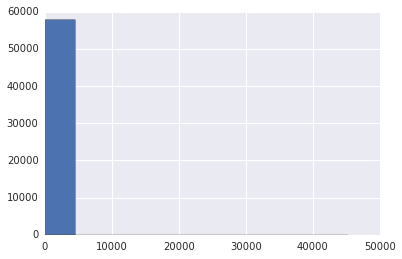

In [4]:
plt.hist(tpm['u2af1_control_k562_rep1'],bins=10)

In [5]:
tpm_log2 = np.log2(tpm)
tpm_log2.replace(to_replace='-inf', value=0, inplace=True)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   6.00000000e+00,   1.20000000e+01,
          1.20000000e+01,   3.10000000e+01,   3.90000000e+01,
          6.70000000e+01,   6.10000000e+01,   7.90000000e+01,
          1.15000000e+02,   1.41000000e+02,   1.76000000e+02,
          1.90000000e+02,   2.03000000e+02,   2.54000000e+02,
          2.20000000e+02,   2.64000000e+02,   2.89000000e+02,
          3.16000000e+02,   3.36000000e+02,   4.40000000e+02,
          4.26000000e+02,   5.11000000e+02,   5.11000000e+02,
          4.26000000e+02,   4.76000000e+02,   4.73000000e+02,
          4.67000000e+02,   3.61510000e+04,   5.05000000e+02,
          4.81000000e+02,   5.03000000e+02,   5.59000000e+02,
          5.02000000e+02,   4.99000000e+02,   5.09000000e+02,
          5.58000000e+02,   5.04000000e+02,   5.35000000e+02,
        

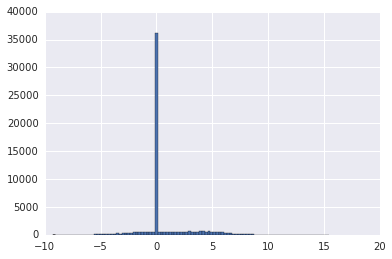

In [6]:
plt.hist(tpm_log2['u2af1_control_k562_rep1'],bins=100)

In [7]:
tpm_filtered = tpm.loc[tpm.mean(axis=1) > 4]
rpkm_filtered = rpkm.loc[rpkm.mean(axis=1) > 1]
print len(rpkm)
print len(rpkm_filtered)
print len(tpm)
print len(tpm_filtered)

57820
11750
57820
10895


In [8]:
tpm_filtered_log2 = np.log2(tpm_filtered)
tpm_filtered_log2.replace(to_replace='-inf', value=0, inplace=True)

rpkm_filtered_log2 = np.log2(rpkm_filtered)
rpkm_filtered_log2.replace(to_replace='-inf', value=0, inplace=True)

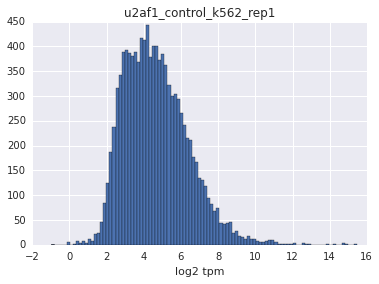

In [9]:
plt.hist(tpm_filtered_log2['u2af1_control_k562_rep1'],bins=100)
plt.xlabel("log2 tpm")
plt.title("u2af1_control_k562_rep1")

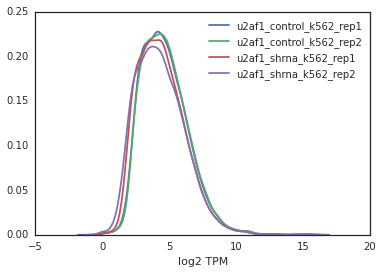

In [10]:
sns.set_style("white")
for i in tpm_filtered_log2.columns:
    sns.kdeplot(tpm_filtered_log2[i])
    plt.xlabel("log2 TPM")


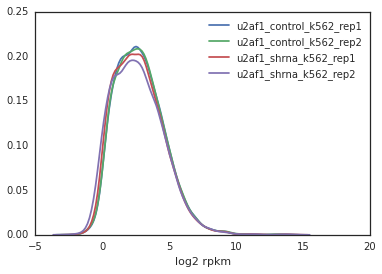

In [11]:
sns.set_style("white")
for i in rpkm_filtered_log2.columns:
    sns.kdeplot(rpkm_filtered_log2[i])
    plt.xlabel("log2 rpkm")


/home/ecwheele/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


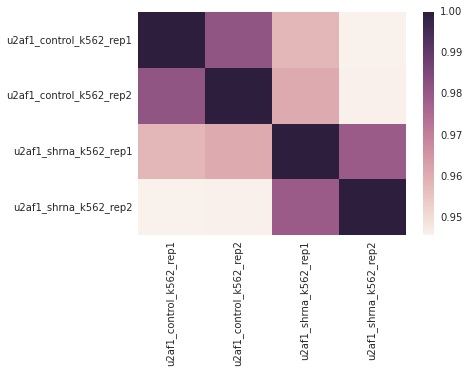

In [12]:
sns.heatmap(tpm_filtered_log2.corr())

In [16]:
differential_expression = pd.read_csv("/home/ecwheele/shared_for_class/deseq2_results.csv",
                                     index_col=0)
differential_filtered = differential_expression.loc[(differential_expression['padj'] < 0.05) &
                         (abs(differential_expression['log2FoldChange']) > 1)]
print len(differential_filtered)

135


In [17]:
differential_filtered.index

Index([u'ENSG00000158062.16', u'ENSG00000181773.6', u'ENSG00000117569.14',
       u'ENSG00000085465.11', u'ENSG00000260948.1', u'ENSG00000176444.14',
       u'ENSG00000143627.13', u'ENSG00000272068.1', u'ENSG00000162733.12',
       u'ENSG00000198771.6',
       ...
       u'ENSG00000093010.7', u'ENSG00000273343.1', u'ENSG00000233338.1',
       u'ENSG00000101940.13', u'ENSG00000207939.1', u'ENSG00000101935.5',
       u'ENSG00000147402.7', u'ENSG00000160211.11', u'ENSG00000198888.2',
       u'ENSG00000198786.2'],
      dtype='object', length=135)

In [18]:
differential_filtered.to_csv("/home/ecwheele/shared_for_class/genes_filtered_diff_expr.csv")

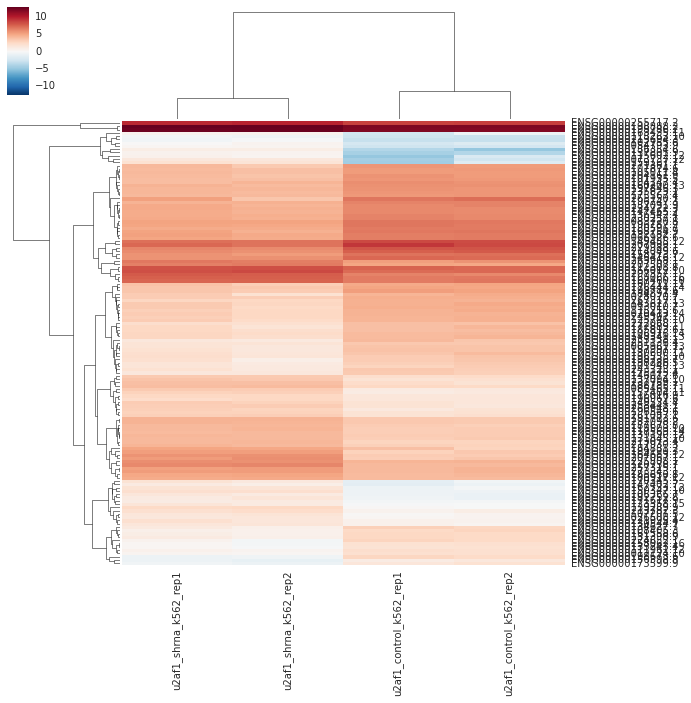

In [19]:
sns.clustermap(tpm_log2.loc[differential_filtered.index])

In [27]:
differential_filtered.sort(columns = 'lfcSE', ascending=False).head()

/home/ecwheele/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000170345.5,34.692435,1.285534,0.273275,4.704181,2.548866e-06,0.000051
ENSG00000163435.11,40.171673,1.034232,0.273272,3.784619,1.539439e-04,0.001588
ENSG00000102755.6,34.715891,1.241066,0.273219,4.542385,5.562142e-06,0.000098
ENSG00000224652.1,36.034465,-1.076120,0.273206,-3.938857,8.187062e-05,0.000937
ENSG00000054793.9,35.337847,1.466890,0.273171,5.369863,7.879631e-08,0.000003


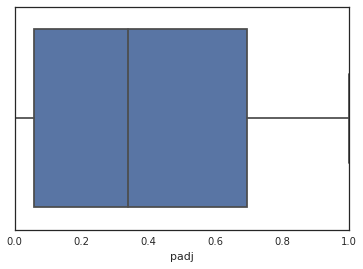

In [24]:
sns.boxplot(differential_expression['padj'])

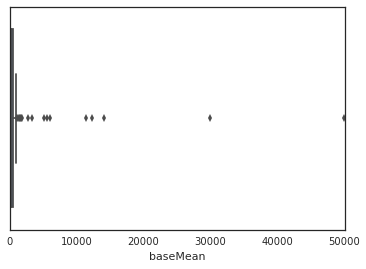

In [53]:
sns.boxplot(differential_filtered['baseMean'])

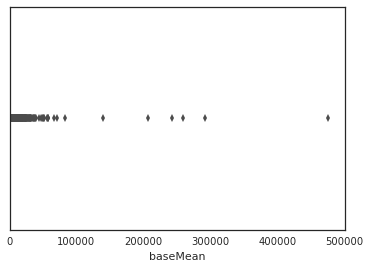

In [54]:
sns.boxplot(differential_expression['baseMean'])

In [30]:
tpm_filtered_log2.loc["ENSG00000227232.4"]

u2af1_control_k562_rep1    3.096999
u2af1_control_k562_rep2    3.050086
u2af1_shrna_k562_rep1      2.837710
u2af1_shrna_k562_rep2      1.628705
Name: ENSG00000227232.4, dtype: float64